In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
# spectra = "D:\\220202 mass spec\\processed/220202 PanZ 2 hrs repeats_34257_GB3_01_82732.d.mzML"

# spectra = "D:\\220203 mass spec\\processed/220203 PanZ 2 hrs repeats_34263_RA4_01_82765.d.mzML"
spectra = "D:\\220208 mass spec\\processed/220208 PanZ repeats 5uL_343004_RE4_01_82913.d.mzML"


plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/PanZ repeats.xlsx"

hdf5 does not exist
Reading mzML: D:\220208 mass spec\processed/220208 PanZ repeats 5uL_343004_RE4_01_82913.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\220208 mass spec\processed/220208 PanZ repeats 5uL_343004_RE4_01_82913.d.mzML.gz
Error getting TIC in mzML; trying to make it...


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Imported Data. Constructing TIC
Done
1307 2
Noise Level: 0.13949103695512993 Window: 0.6
Bad Peak [0.418933   0.83633418] 0.241884 [0.418933, 0.660817]
1.24273 0.21194999999999986
2.16953 0.21178000000000008
3.11265 0.2700300000000002
4.05545 0.17859999999999943
5.011 0.16624000000000017
Getting scans: [140, 191]
Length merge axis: 38810
Getting scans: [366, 417]
Length merge axis: 38925
Getting scans: [592, 657]
Length merge axis: 39099
Getting scans: [821, 864]
Length merge axis: 39030
Getting scans: [1049, 1089]
Length merge axis: 39095


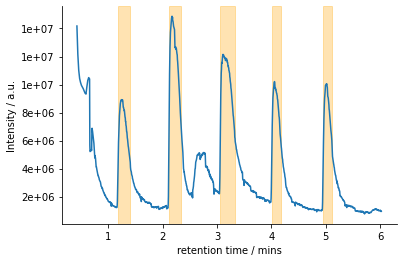

In [4]:
eng.load_mzml(spectra, clear_hdf5=True)
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = 1, ub = 5.5) 
eng.add_chrom_peaks2() 
eng.plot_tic(peak_windows = True)

# spectra_paths = ["D:\\220202 mass spec\\processed/220202 PanZ 2 hrs repeats_34257_GB3_01_82732.d.mzML",
#                  "D:\\220203 mass spec\\processed/220203 PanZ 2 hrs repeats_34263_RA4_01_82765.d.mzML",
#                  "D:\\220207 mass spec\\processed/220207 PanZ repeats_342834_BE8_01_82841.d.mzML",
# ]
# plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/PanZ repeats x15.xlsx"
# eng.load_multi_mzml(spectra_paths, plot = True, clear_hdf5 = True)


In [5]:
# if eng.ticdat[:, 0].max() > 100: 
#     eng.ticdat[:, 0] = eng.tic[:, 0] = eng.ticdat[:, 0]/60 # add in check in code?

In [6]:
help(eng.update_config)

Help on method update_config in module unidec_modules.v3_SeqChrom:

update_config(minmz='', maxmz='', massub=10000, masslb=100000, peakthresh=0.01, subtype=2, subbuff=100, datanorm=0, numit=100, massbins=1, mzsig=0, startz=10, endz=100, zzsig=1, psig=1, beta=0, psfun=0, peaknorm=0, peakwindow=10, exnorm=0, numz=50, mtabsig=0.0, molig=0.0, mzbins=0.0, msig=0.0, smooth=0, reductionpercent=0.0, aggressive=0, rawflag=0, nativezub=1000.0, nativezlb=-1000.0, poolflag=2, noiseflag=0, linflag=2, isotopemode=0, baselineflag=1, orbimode=0, peakplotthresh=0.1, adductmass=1.007276467, intthresh=0) method of unidec_modules.v3_SeqChrom.SeqChrom instance
    [summary]
    
    Args:
        minmz (str, optional): [description]. Defaults to "".
        maxmz (str, optional): [description]. Defaults to "".
        massub (int, optional): [description]. Defaults to 10000.
        masslb (int, optional): [description]. Defaults to 100000.
        peakthresh (float, optional): [description]. Defaults to 0

In [7]:
eng.update_config(masslb = 10000, massub = 20000, peakthresh = 0.02, peakwindow = 5, minmz="350")
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.10290960000000027
Execution Time: 9.036750399999999
Execution Time: 0.2775650000000027
Peak info saved to: D:\220208 mass spec\processed\UniDec_Figures_and_Files\220208 PanZ repeats 5uL_343004_RE4_01_82913.d_extracts.txt


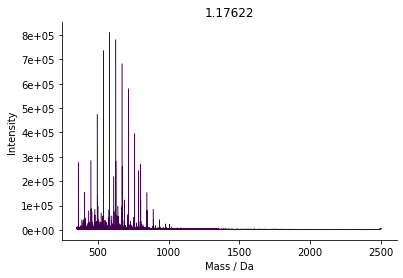

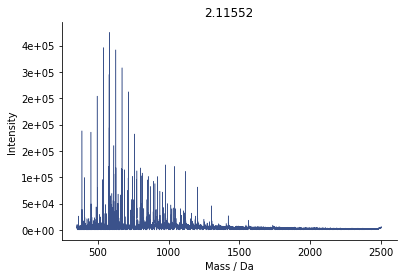

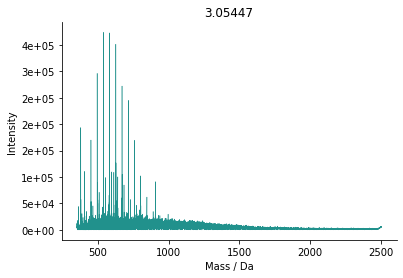

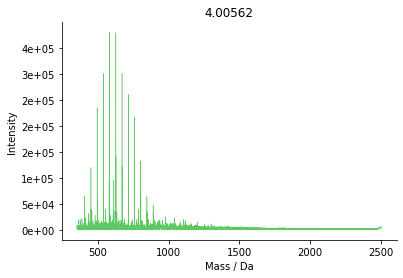

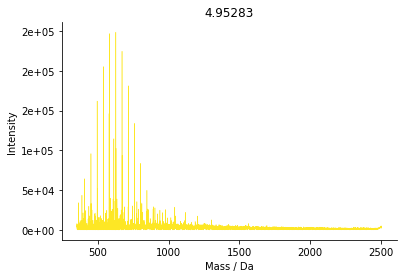

In [8]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

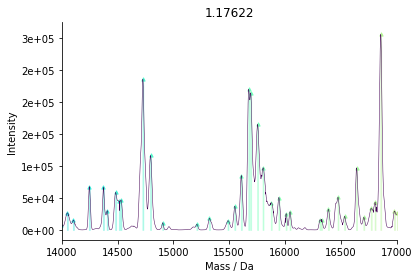

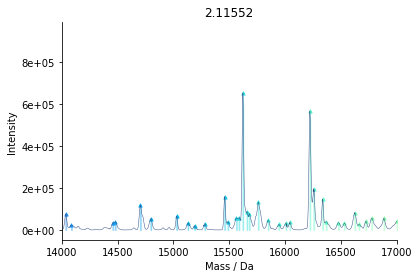

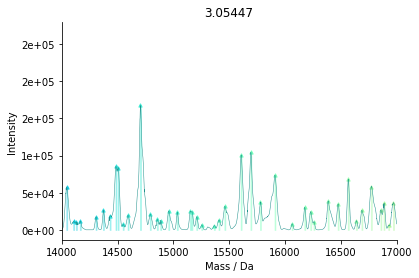

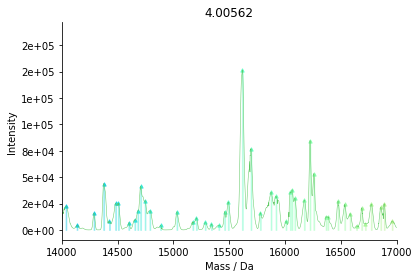

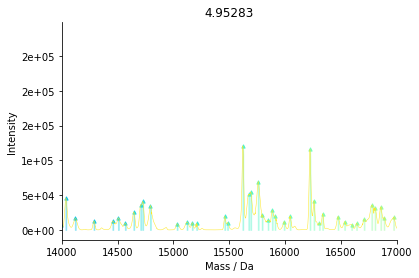

In [9]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [14000, 17000])

In [10]:
eng.upload_map(plate_map)

(  Reaction      Species  Concentration Units     Mass Reagent_Type Sequence
 0     PanZ         PanZ          100.0    uM  16223.0      Protein      NaN
 1     PanZ  PanZ-GVSEYG            NaN    uM  15623.0      Protein      NaN
 2     PanZ      PanZ-OH            NaN    uM  15029.0      Protein      NaN
 3     PanZ      Unknown            NaN   NaN  15459.0      Protein      NaN,
             Type Reaction Time  Sample  Species  Valid
 Well ID                                               
 1        Protein     PanZ  120       1      NaN   True
 2        Protein     PanZ  120       2      NaN   True
 3        Protein     PanZ  120       3      NaN   True
 4        Protein     PanZ  120       4      NaN   True
 5        Protein     PanZ  120       5      NaN   True)

In [11]:
eng.pmap

,Type,Reaction,Time,Sample,Species,Valid
Well ID,,,,,,
1,Protein,PanZ,120,1,NaN,True
2,Protein,PanZ,120,2,NaN,True
3,Protein,PanZ,120,3,NaN,True
4,Protein,PanZ,120,4,NaN,True
5,Protein,PanZ,120,5,NaN,True


In [12]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,PanZ,PanZ,100.0,uM,16223.0,Protein,NaN
1,PanZ,PanZ-GVSEYG,NaN,uM,15623.0,Protein,NaN
2,PanZ,PanZ-OH,NaN,uM,15029.0,Protein,NaN
3,PanZ,Unknown,NaN,NaN,15459.0,Protein,NaN


In [13]:
eng.process_maps(groupby = 'Reaction', variable = 'Sample')

In [14]:
eng.pmap2

,Type,Reaction,Time,Sample,Species,Valid,PanZ,PanZ-GVSEYG,PanZ-OH,Unknown,Spectra
Well ID,,,,,,,,,,,
1,Protein,PanZ,120,1,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,PanZ,120,2,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,PanZ,120,3,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
4,Protein,PanZ,120,4,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
5,Protein,PanZ,120,5,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...


invalidate data using eng.invalidate()

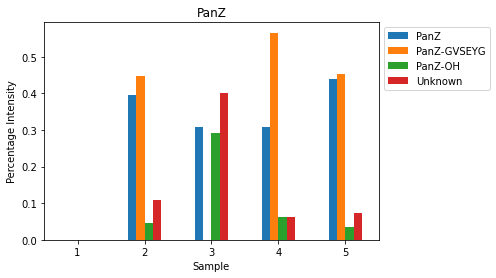

In [15]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Sample')

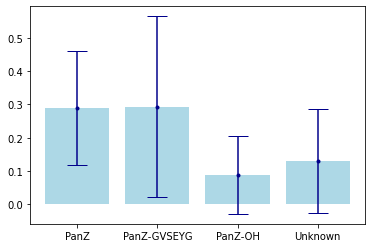

In [16]:
df = eng.data_df['PanZ']
means, std = df.mean(), df.std()
means.index
plt.errorbar(x=np.array(means.index), y=np.array(means), yerr=np.array(std), fmt='o', marker = ".",
             
             capsize = 10, color = 'darkblue')
plt.bar(x=np.array(means.index), height=np.array(means), color = 'lightblue')
plt.show()

In [17]:
# eng.invalidate([2, 5, 14], group = 'Sample')

Sample:2 successfully invalidated
Sample:2 successfully invalidated
Sample:5 successfully invalidated
Sample:5 successfully invalidated
Sample:14 successfully invalidated
Sample:14 successfully invalidated


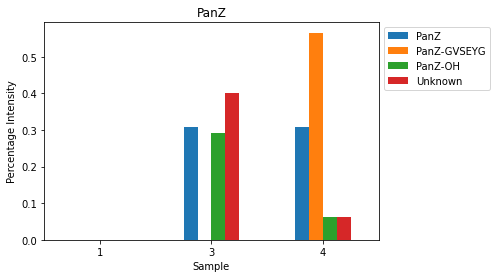

In [18]:
df = eng.data_df['PanZ']
means, std = df.mean(), df.std()

plt.show()
eng.plot_data(plot_type='bar', groupby='Sample')

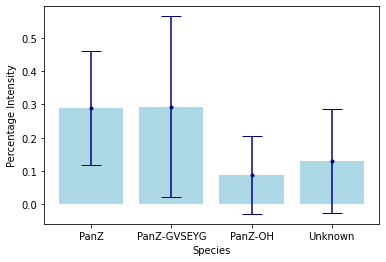

In [19]:
plt.errorbar(x=np.array(means.index), y=np.array(means), yerr=np.array(std), fmt='o', marker = ".",
             
             capsize = 10, color = 'darkblue')
plt.bar(x=np.array(means.index), height=np.array(means), color = 'lightblue')
plt.ylabel("Percentage Intensity")
plt.xlabel("Species")
plt.show()